In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("../../Resources/house_data_colombo_with_cluster_feature.csv")

X = df.drop('price', axis = 1)
y = df['cluster']

#Standardizing the features

X = StandardScaler().fit_transform(X)

# Components selection in PCA

pca = PCA(0.95)
pca.fit(X)
print('Optimal number of components: ' ,pca.n_components_)

Optimal number of components:  5


In [2]:
# 2 Components

pca = PCA(n_components=2)


principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['cluster']]], axis = 1)
finalDf.head(5)


,principal component 1,principal component 2,cluster
0,-1.108546,-0.625342,0
1,0.509343,-0.549620,0
2,-0.220152,-0.517665,0
3,1.269474,-0.623945,0
4,0.880687,0.186678,0


In [3]:
# import matplotlib.pyplot as plt
# plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], alpha=.1, color='black')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

Explained variance ratio:  [0.44401651 0.18789935]


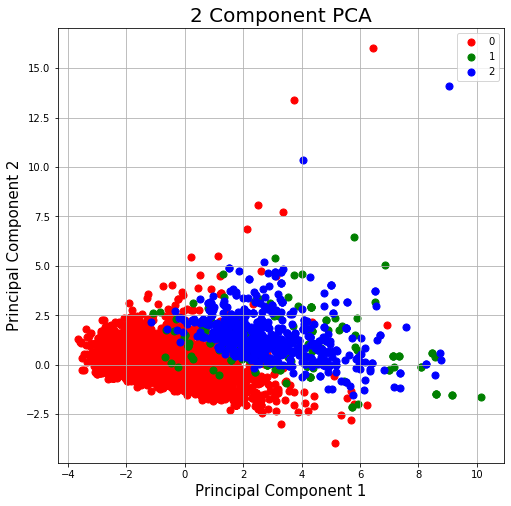

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print('Explained variance ratio: ', pca.explained_variance_ratio_)

In [5]:
# 3 Components
from sklearn.decomposition import PCA

pca = PCA(n_components=3)


principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['cluster']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,cluster
0,-1.108546,-0.625342,0.590028,0
1,0.509343,-0.549620,-0.345689,0
2,-0.220152,-0.517665,-0.035108,0
3,1.269474,-0.623945,-0.489113,0
4,0.880687,0.186678,-2.053092,0


<IPython.core.display.Javascript object>


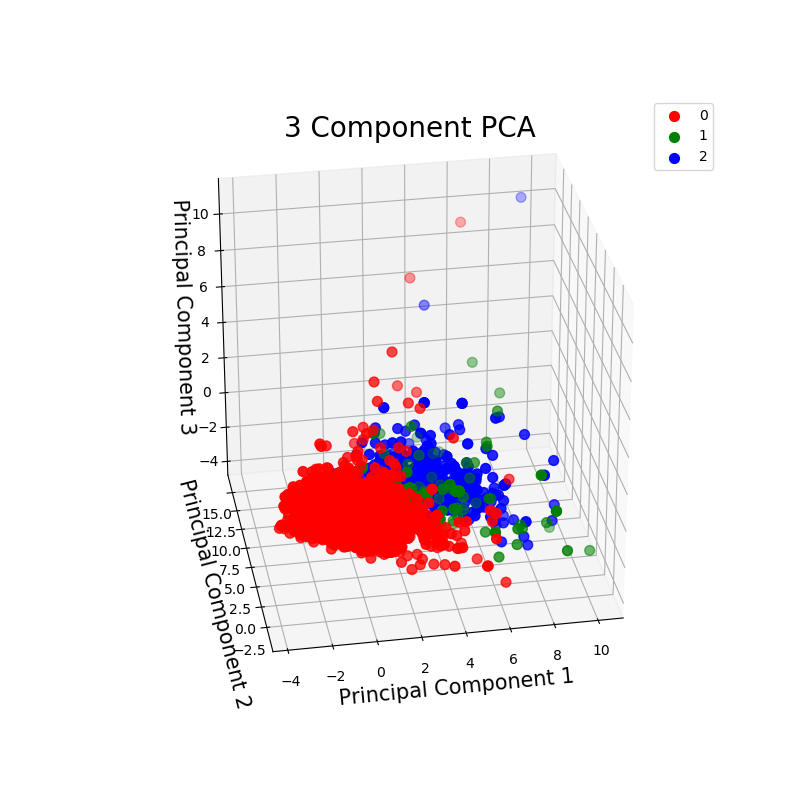

[0.44401651 0.18789935 0.15707334]


In [7]:
import ipyvolume as ipv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
fig = plt.figure(figsize = (8,8))
plt.axes(projection='3d')
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

print(pca.explained_variance_ratio_)